#Execute this for CPU only process
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="-1"


In [1]:

#Tensorflow library. Used to implement machine learning models
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#Numpy contains helpful functions for efficient mathematical calculations
import numpy as np
#Dataframe manipulation library
import pandas as pd
#Graph plotting library
import matplotlib.pyplot as plt
%matplotlib inline
import timeit


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
st = timeit.default_timer()

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


In [4]:
start = timeit.default_timer()

#Loading in the ratings dataset
ratings_data = pd.read_csv('C:/Users/kanis/Untitled Folder/ml-1m/ratings.dat', sep='::', header=None,engine='python')
#ratings_df.head()
#Loading in the movies dataset
movies_data = pd.read_csv('C:/Users/kanis/Untitled Folder/ml-1m/movies.dat', sep='::', header=None, engine='python')
#movies_df.head()

# !ls ../input/ml-1m/ml-1m
stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time))

Program Executed in 4.150120999999999


In [5]:
start = timeit.default_timer()

# so we can add the columns
movies_data.columns = ['MovieID', 'Title', 'Genres']
ratings_data.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time))

Program Executed in 0.0002731999999951995


In [6]:
movies_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
start = timeit.default_timer()

#lets see the shape of our data
print("shape of movie dataset: ",movies_data.shape)
print("shape of rating dataset: ",ratings_data.shape)

stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time))

shape of movie dataset:  (3883, 3)
shape of rating dataset:  (1000209, 4)
Program Executed in 0.00016480000000029804


In [9]:
import threading
start = timeit.default_timer()

# Create a DataFrame from the dictionary
ratings_df = pd.DataFrame(ratings_data)

def print_data(data_type, data):
    print(f"shape of {data_type} dataset: ", data.shape)

# Create threads for printing the shape of the movie and rating datasets
movie_data_thread = threading.Thread(target=print_data, args=("movie", movies_data))
rating_data_thread = threading.Thread(target=print_data, args=("rating", ratings_data))

# Start the threads
movie_data_thread.start()
rating_data_thread.start()

# Wait for the threads to finish
movie_data_thread.join()
rating_data_thread.join()


stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time))


shape of movie dataset:  (3883, 3)
shape of rating dataset:  (1000209, 4)
Program Executed in 0.00312420000000202


# Divide the rating data into four equal-sized chunks
chunk_size = len(ratings_data) // 4
rating_data_chunks = [ratings_data[i:i + chunk_size] for i in range(0, len(ratings_data), chunk_size)]

# Create four threads, each handling a data chunk
thread1 = threading.Thread(target=print_data, args=("rating", ratings_data, 0, chunk_size))
thread2 = threading.Thread(target=print_data, args=("rating", ratings_data, chunk_size, chunk_size * 2))
thread3 = threading.Thread(target=print_data, args=("rating", ratings_data, chunk_size * 2, chunk_size * 3))
thread4 = threading.Thread(target=print_data, args=("rating", ratings_data, chunk_size * 3, chunk_size * 4))

# Start the four threads
thread1.start()
thread2.start()
thread3.start()
thread4.start()

# Wait for all threads to finish
thread1.join()
thread2.join()
thread3.join()
thread4.join()

stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in " + str(execution_time))

In [10]:
movies_data.tail()

,MovieID,Title,Genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [11]:
movies_data['List Index'] = movies_data.index
movies_data.head()

,MovieID,Title,Genres,List Index
0,1,Toy Story (1995),Animation|Children's|Comedy,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama,3
4,5,Father of the Bride Part II (1995),Comedy,4


In [12]:
start = timeit.default_timer()


#Merging movies_df with ratings_df by MovieID
merged_data = movies_data.merge(ratings_data, on='MovieID')
#Dropping unecessary columns
merged_data = merged_data.drop('Timestamp', axis=1).drop('Title', axis=1).drop('Genres', axis=1)
#Displaying the result
merged_data.head()

stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time))

Program Executed in 0.19285469999999805


In [13]:
start = timeit.default_timer()

#Group up by UserID
userGroup = merged_data.groupby('UserID')
userGroup.first().head()

stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time))

Program Executed in 0.032363300000000095


In [14]:
start = timeit.default_timer()


#Amount of users used for training
amountOfUsedUsers = 1000
#Creating the training list
train_X = []
#For each user in the group
for userID, curUser in userGroup:
    #Create a temp that stores every movie's rating
    temp = [0]*len(movies_data)
    #For each movie in curUser's movie list
    for num, movie in curUser.iterrows():
        #Divide the rating by 5 and store it
        temp[movie['List Index']] = movie['Rating']/5.0
    #Now add the list of ratings into the training list
    train_X.append(temp)
    #Check to see if we finished adding in the amount of users for training
    if amountOfUsedUsers == 0:
        break
    amountOfUsedUsers -= 1
    
    
stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time))

Program Executed in 5.132490400000002


In [15]:
start = timeit.default_timer()

hiddenUnits = 20
visibleUnits = len(movies_data)
vb = tf.placeholder("float", [visibleUnits]) #Number of unique movies
hb = tf.placeholder("float", [hiddenUnits]) #Number of features we're going to learn
W = tf.placeholder("float", [visibleUnits, hiddenUnits])

stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time))

Program Executed in 0.003126299999998139


In [16]:
start = timeit.default_timer()

#Phase 1: Input Processing
v0 = tf.placeholder("float", [None, visibleUnits])
_h0= tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))
#Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time))

Program Executed in 0.016332500000004302


In [17]:
start = timeit.default_timer()

#Learning rate
alpha = 1.0
#Create the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
#Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])
#Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time))

Instructions for updating:
Use `tf.cast` instead.
Program Executed in 0.01730750000000114


In [27]:
import tensorflow as tf
import cupy as cp

# ... Define model parameters and placeholders ...

# Use cupy arrays for faster GPU computations
train_X_gpu = cp.asarray(train_X)
cur_w_gpu = cp.zeros_like(cur_w)
cur_vb_gpu = cp.zeros_like(cur_vb)
cur_hb_gpu = cp.zeros_like(cur_hb)

# ... Phase 1 and 2 calculations ...

# Perform matrix multiplications on GPU using cupy
w_pos_grad_gpu = cp.matmul(train_X_gpu.T, h0_gpu)
w_neg_grad_gpu = cp.matmul(v1_gpu.T, h1_gpu)

# ... Calculate Contrastive Divergence ...

# Transfer gradients and perform updates on CPU
w_pos_grad = cp.asnumpy(w_pos_grad_gpu)
w_neg_grad = cp.asnumpy(w_neg_grad_gpu)
CD = (w_pos_grad - w_neg_grad) / batchsize

update_w = cur_w + alpha * CD
update_vb = cur_vb + alpha * cp.mean(v0 - v1, axis=0)
update_hb = cur_hb + alpha * cp.mean(h0 - h1, axis=0)

# Update weights and biases on GPU
cur_w_gpu = update_w
cur_vb_gpu = update_vb
cur_hb_gpu = update_hb

# ... Error calculation and training loop ...

# Transfer data back to CPU for error calculation
v0_cpu = cp.asnumpy(v0_gpu)
v1_cpu = cp.asnumpy(v1_gpu)
err = v0_cpu - v1_cpu
# ... Remaining code of the training loop ...


AttributeError: module 'cupy._environment' has no attribute '_preload_libraries'

In [28]:
import cupy as cp


AttributeError: module 'cupy._environment' has no attribute '_preload_libraries'

In [18]:
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

In [19]:
start = timeit.default_timer()

#Current weight
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)
#Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)
#Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)
#Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time))

Program Executed in 0.012616600000001199


In [20]:
import tensorflow as tf
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")
    
    

GPU found


In [23]:

epochs = 15
batchsize = 100
errors = []



# Define a separate function for weight, bias updates, and error calculation
def update_weights_and_biases(batch):
  cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
  cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_vb})
  cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_vb})
  # Calculate error using updated weights and biases
  error = sess.run(err_sum, feed_dict={v0: batch, W: cur_w, vb: cur_vb, hb: cur_nb})
  return cur_w, cur_vb, cur_nb, error

# Create a tf.data dataset and apply parallel updates
dataset = tf.data.Dataset.from_tensor_slices(train_X)
dataset = dataset.map(update_weights_and_biases, num_parallel_calls=tf.data.experimental.AUTOTUNE)

iterator = dataset.make_one_shot_iterator()
next_element = iterator.get_next()

# Training loop with parallelization using tf


TypeError: in user code:

    File "C:\Users\kanis\AppData\Local\Temp\ipykernel_1460\2682205160.py", line 9, in update_weights_and_biases  *
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})

    TypeError: The value of a feed cannot be a tf.Tensor object. Acceptable feed values include Python scalars, strings, lists, numpy ndarrays, or TensorHandles. For reference, the tensor object was Tensor("args_0:0", shape=(3883,), dtype=float32) which was passed to the argument `feed_dict` with key Tensor("Placeholder_3:0", shape=(?, 3883), dtype=float32).


1 Physical GPUs, 1 Logical GPU
0.123915784
0.08303084
0.068473674
0.061264507
0.05459659
0.049220305
0.04613392
0.044961467
0.044092182
0.043263756
0.042682365
0.04241398
0.041689176
0.04102114
0.04062643


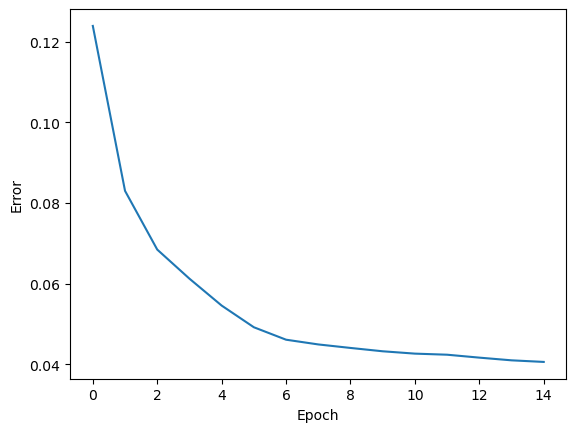

Program Executed in -866.6674238


In [20]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

start = timeit.default_timer()


epochs = 15
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(train_X), batchsize), range(batchsize, len(train_X), batchsize)):
        batch = train_X[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_nb
    errors.append(sess.run(err_sum, feed_dict={v0: train_X, W: cur_w, vb: cur_vb, hb: cur_nb}))
    print (errors[-1])
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()


stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time))

In [21]:
#Selecting the input user
inputUser = [train_X[75]]

In [22]:
start = timeit.default_timer()

#Feeding in the user and reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={ v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={ hh0: feed, W: prv_w, vb: prv_vb})

stop = timeit.default_timer()
execution_time = stop - start

print("Program Executed in "+str(execution_time))

Program Executed in 0.02123449999999849


In [23]:
scored_movies_df_75 = movies_data
scored_movies_df_75["Recommendation Score"] = rec[0]
scored_movies_df_75.sort_values(["Recommendation Score"], ascending=False).head(20)

,MovieID,Title,Genres,List Index,Recommendation Score
2789,2858,American Beauty (1999),Comedy|Drama,2789,0.811264
604,608,Fargo (1996),Crime|Drama|Thriller,604,0.672806
2928,2997,Being John Malkovich (1999),Comedy,2928,0.621166
2693,2762,"Sixth Sense, The (1999)",Thriller,2693,0.618135
2327,2396,Shakespeare in Love (1998),Comedy|Romance,2327,0.607693
1575,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,1575,0.567660
589,593,"Silence of the Lambs, The (1991)",Drama|Thriller,589,0.564947
293,296,Pulp Fiction (1994),Crime|Drama,293,0.516019
2530,2599,Election (1999),Comedy,2530,0.501186
3091,3160,Magnolia (1999),Drama,3091,0.459090


In [24]:
merged_data.iloc[75]


MovieID         1
List Index      0
UserID        215
Rating          4
Name: 75, dtype: int64

In [25]:
movies_data_75 = merged_data[merged_data['UserID']==215]
movies_data_75.head()

,MovieID,List Index,UserID,Rating
75,1,0,215,4
11873,24,23,215,5
67543,260,257,215,5
82782,316,313,215,4
97063,356,352,215,5


In [26]:
#Merging movies_df with ratings_df by MovieID
merged_data_75 = scored_movies_df_75.merge(movies_data_75, on='MovieID', how='outer')
#Dropping unecessary columns
merged_data_75 = merged_data_75.drop('List Index_y', axis=1).drop('UserID', axis=1)

In [27]:
merged_data_75.sort_values(["Recommendation Score"], ascending=False).head(20)

,MovieID,Title,Genres,List Index_x,Recommendation Score,Rating
2789,2858,American Beauty (1999),Comedy|Drama,2789,0.811264,NaN
604,608,Fargo (1996),Crime|Drama|Thriller,604,0.672806,NaN
2928,2997,Being John Malkovich (1999),Comedy,2928,0.621166,NaN
2693,2762,"Sixth Sense, The (1999)",Thriller,2693,0.618135,NaN
2327,2396,Shakespeare in Love (1998),Comedy|Romance,2327,0.607693,NaN
1575,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,1575,0.567660,4.0
589,593,"Silence of the Lambs, The (1991)",Drama|Thriller,589,0.564947,NaN
293,296,Pulp Fiction (1994),Crime|Drama,293,0.516019,NaN
2530,2599,Election (1999),Comedy,2530,0.501186,NaN
3091,3160,Magnolia (1999),Drama,3091,0.459090,NaN


In [28]:
sto = timeit.default_timer()
execution_time = sto - st
print("Program Executed in "+str(execution_time))

Program Executed in 28.147358000000004
